# SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So, let's see the task of sales prediction with machine learning using python.

#### Importing necessary libraries

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sea

#### Upload Dataset

In [43]:
dataset = pd.read_csv(r"C:\Users\Admin\Downloads\Advertising.csv",index_col=0) 
#index_col=0 , This is to allow you to set which columns to be used as the index of the dataframe.
dataset.index.name = "S.no" #giving name to the index 0
dataset

,TV,Radio,Newspaper,Sales
S.no,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


#### Random Rows of dataset

In [44]:
dataset.sample(10)

,TV,Radio,Newspaper,Sales
S.no,,,,
71,199.1,30.6,38.7,18.3
138,273.7,28.9,59.7,20.8
4,151.5,41.3,58.5,18.5
148,243.2,49.0,44.3,25.4
102,296.4,36.3,100.9,23.8
91,134.3,4.9,9.3,11.2
92,28.6,1.5,33.0,7.3
169,215.4,23.6,57.6,17.1
116,75.1,35.0,52.7,12.6


#### Dimensions of dataset

In [45]:
dataset.shape

(200, 4)

#### Columns of dataset

In [46]:
print("Names of columns in advertising sales prediction dataset are: \n\n",dataset.columns)

Names of columns in advertising sales prediction dataset are: 

 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


#### Information of dataset

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


#### Size of dataset

In [48]:
dataset.size

800

In [49]:
dc=dataset.corr()

#### Statistics summary

In [50]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# HEAT MAP

#### METHOD USED - Generating correlation matrix using Seaborn library

[Text(0.5, 1.0, 'Heatmap of Correlated values')]

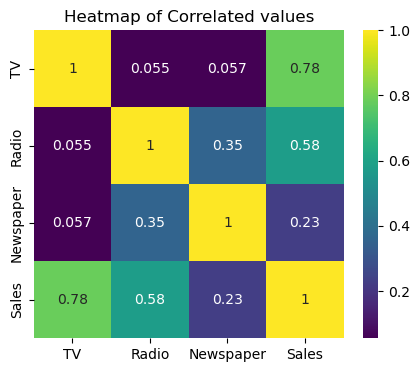

In [51]:
fig, ax = plt.subplots(figsize = (5, 4))

sea.heatmap(dc, annot=True, cmap="viridis").set(title='Heatmap of Correlated values')

### Datatype in dataframe

In [52]:
dataset.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

#### Check duplicacy in dataframe

In [53]:
dataset.duplicated().value_counts()

False    200
dtype: int64

#### Check Null Data in dataframe

In [54]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## GRAPHICAL REPRESENTATION

### 1 - TV advertisement

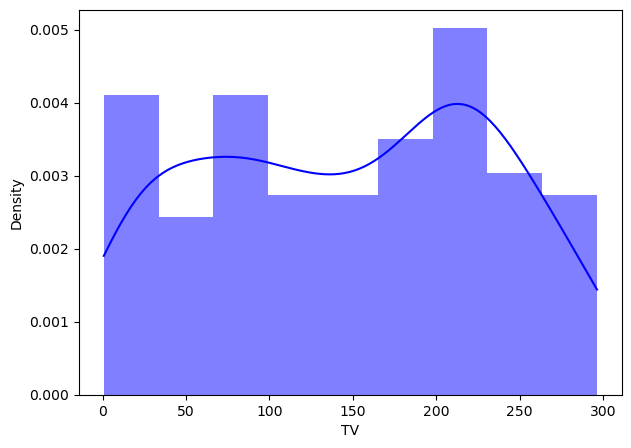

In [55]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['TV'], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

#### 2 - Radio advertisement

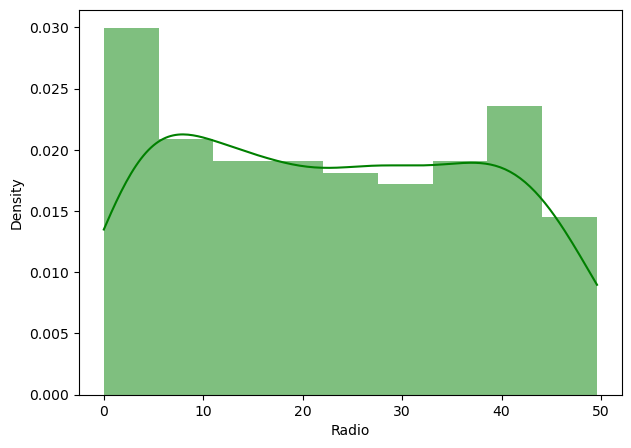

In [56]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Radio'], color="green", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

### 3 - Newspaper advertisement


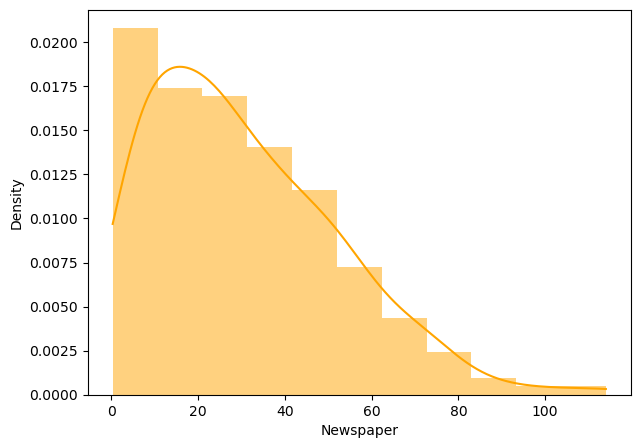

In [57]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Newspaper'], color="orange", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

## Overall Sales graph

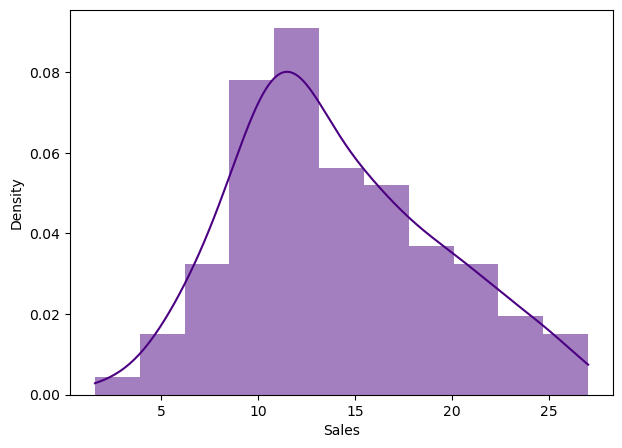

In [58]:
plt.figure(figsize=(7,5))
sea.histplot(dataset['Sales'], color="indigo", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()

## PAIRPLOT GRAPHICAL REPRESENTATION

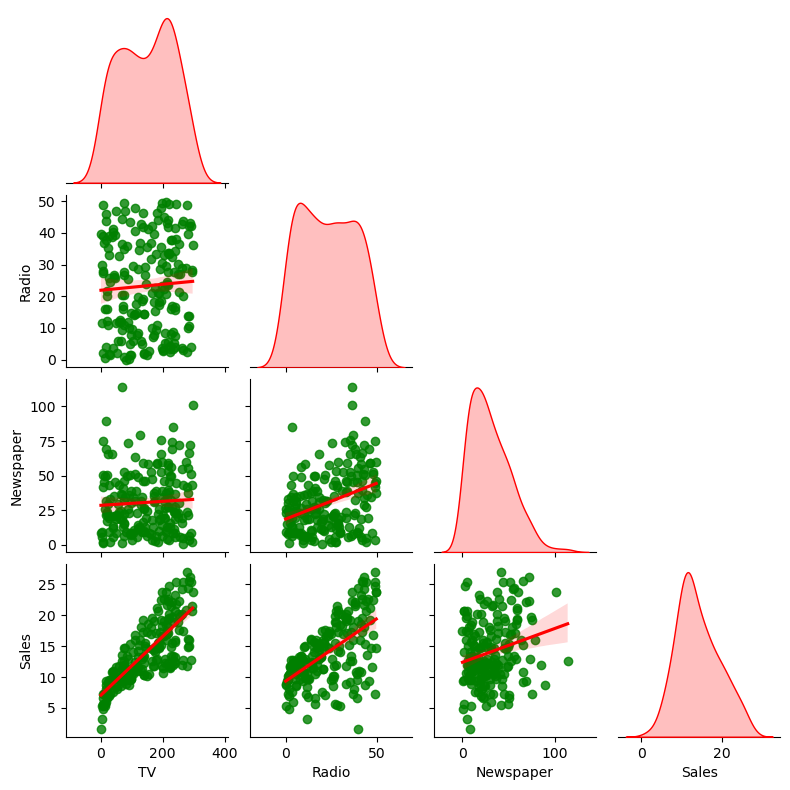

In [59]:
sea.pairplot(dataset,corner=True,diag_kind='kde',kind='reg',height=2,plot_kws={'color':'green','line_kws':{'color':'red'}},diag_kws={'color':'red'});

# DATA MODELLING

### Make x as array having values of all dataset columns except the 'Sales' column

In [60]:
x =np.array(dataset.drop(labels=['Sales'], axis=1))

#### Make y as array having values of 'Sales' column

In [61]:
y =np.array(dataset['Sales'])

#### Splitting Datasets With the Sklearn train_test_split Function : training and testing

The train_test_split function is for splitting a single dataset for two different purposes: training and testing. The training subset is for building your model. The testing subset is for using the model on unknown data to evaluate the performance of the model.

In [62]:
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state = 45)
print("Shape of x_train", x_train.shape)
print("Shape of y_train", y_train.shape)

Shape of x_train (160, 3)
Shape of y_train (160,)


### Multiple Linear Regression With scikit-learn

In [63]:
reg= LinearRegression()

Statisticians say that a regression model fits the data well if the differences between the observations and the predicted values are small and unbiased. Unbiased in this context means that the fitted values are not systematically too high or too low anywhere in the observation space

In [64]:
#Use training set to fit the model
reg.fit(x_train, y_train)

LinearRegression()

If no errors are thrown - the regressor found the best fitting line! , With linear regression, fitting the model means determining the best intercept (model.intercept_) and slope (model.coef_) values of the regression line.

In [65]:
#COEFFICIENT
coefficient = reg.coef_
coefficient

array([ 0.04699362,  0.18346139, -0.00486456])

In [66]:
#INTERCEPT
intercept = reg.intercept_
intercept

2.9856420427515857

## Test the model

 Making Predictions

In [67]:
pred = reg.predict(x_test)
compare= pd.DataFrame({"Actual_sales":list(y_test),"predicted_sales":list(pred)})
compare.head(15)

,Actual_sales,predicted_sales
0,14.9,15.188873
1,8.8,10.205411
2,16.6,16.439320
3,23.8,21.808189
4,12.0,15.887521
5,9.7,8.926802
6,19.0,18.135673
7,11.8,11.365894
8,18.5,17.397555
9,8.5,8.669504


## PREDICTED SALES GRAPH

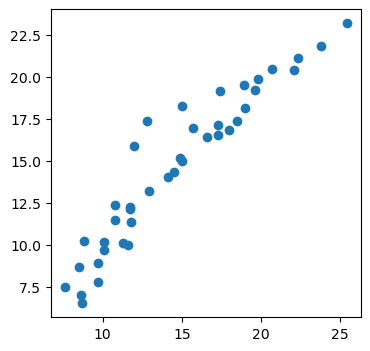

In [68]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, pred)

## Evaluating the Model

### Mean Absolute Error (MAE)

In [69]:
mae = mean_absolute_error(y_test, pred)
print(f'Mean absolute error: {mae:.2f}')

Mean absolute error: 1.08


### Mean Squared Error (MSE)


In [70]:
mse = mean_squared_error(y_test, pred)
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 2.26


### Root Mean Squared Error (RMSE)

In [71]:
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 1.50
